In [1]:
import pandas as pd

In [2]:
df3_WS1T = pd.read_csv("engineering_OF_segment1_workflowS3_has_duration.csv",engine='python')

In [3]:
df3_WS1T.head(n=1)

,CASE_ID,WRKFLW_TSK_MAP_GROUPED,WRKFLW_TSK_MAP_DETAILED,PATH_CRDATETIME,ITEM_CRUSER,WRKFLW_ORG_TYPE_CRUSER,STATUS_ORDER,LATEST_STATUS,WRKFLW_PROCESS,QUERY_PART,...,SPK_CAT_TYPE_CD,BROAD_COURSE_LEVEL,DEGREETYPE,LIABILITY_CATEGORY_CD_RECODE,ORIG_LIABILITY_CATEGORY_CD_RECODE,OFFER_RELEASED_FG,OFFER_OUTCOME_CD,OFFER_CONDITIONS,time_used_str,time_used_second
0,1140679|518493|795102,Assessment Outcome - Successful,Assessment Outcome - Successful,25/10/2019 11:48:05,KRIT,Faculty,5,N,2. Perform Assessment,Part 3 - Assessment Outcome,...,MCW,HDCW,Full Degree,OF,OF,Y,NaN,Y,0 days 0 hours 0 minutes 11 seconds,11.0


In [4]:
#store unique WRKFLW_TSK_MAP_DETAILED
WRKFLW_TSK_MAP_DETAILED_list = df3_WS1T['WRKFLW_TSK_MAP_DETAILED'].tolist()
unique_WRKFLW_TSK_MAP_DETAILED_list = set(WRKFLW_TSK_MAP_DETAILED_list)
len(unique_WRKFLW_TSK_MAP_DETAILED_list)
unique_WRKFLW_TSK_MAP_DETAILED_list

{'AR - Satisfied - Academic results for prior tertiary studies',
 'AR - Satisfied - Credit for previous study',
 'AR - Satisfied - Further information (1)',
 'Assessment Decision - No Decision',
 'Assessment Decision - Qualified',
 'Assessment Outcome - Successful',
 'Create Offer',
 'OC - Created - English language requirements',
 'OC - Created - Evidence of course completion',
 'Release Offer',
 'Send for Assessment'}

In [5]:
#store unique CASE_ID
ID_list = df3_WS1T['CASE_ID'].tolist()
unique_ID_list = set(ID_list)
len(unique_ID_list)

73

In [6]:
#create dataframe columns->unique_WRKFLW_TSK_MAP_DETAILED row->unique_ID
df = pd.DataFrame(columns = unique_WRKFLW_TSK_MAP_DETAILED_list, index = unique_ID_list )
df

,Assessment Decision - Qualified,Release Offer,AR - Satisfied - Further information (1),Assessment Decision - No Decision,AR - Satisfied - Academic results for prior tertiary studies,OC - Created - Evidence of course completion,Send for Assessment,AR - Satisfied - Credit for previous study,Create Offer,OC - Created - English language requirements,Assessment Outcome - Successful
786367|405984|629695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1006948|421760|653240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1056808|409506|733846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1024762|559237|855622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999931|334099|523071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1073871|519536|796634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1140297|517940|794266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
804963|417846|665702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011845|497324|763723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#sotre id as key and workflow detail of the id as value into dictionary
from collections import defaultdict
ID_WRKFLW_dict = defaultdict(list)
for i, j in zip(df3_WS1T.CASE_ID,df3_WS1T.WRKFLW_TSK_MAP_DETAILED):
    ID_WRKFLW_dict[i].append(j)
len(ID_WRKFLW_dict)

73

In [8]:
#change the value
for key in ID_WRKFLW_dict.keys():
    for process in ID_WRKFLW_dict[key]:
            df.loc[key, process] = 1
zero_one_table = df.fillna(0)
zero_one_table

,Assessment Decision - Qualified,Release Offer,AR - Satisfied - Further information (1),Assessment Decision - No Decision,AR - Satisfied - Academic results for prior tertiary studies,OC - Created - Evidence of course completion,Send for Assessment,AR - Satisfied - Credit for previous study,Create Offer,OC - Created - English language requirements,Assessment Outcome - Successful
786367|405984|629695,0,1,0,0,0,0,0,0,0,0,1
1006948|421760|653240,0,1,0,0,0,0,0,0,0,0,1
1056808|409506|733846,0,1,0,0,0,0,0,0,0,0,1
1024762|559237|855622,0,1,0,0,0,0,0,0,1,0,1
999931|334099|523071,0,1,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1073871|519536|796634,0,1,0,0,0,0,0,0,1,0,1
1140297|517940|794266,0,1,0,0,0,0,0,0,0,0,1
804963|417846|665702,0,1,0,0,0,0,0,0,0,0,1
1011845|497324|763723,0,1,0,0,0,0,0,0,1,0,1


In [9]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

features= list(unique_WRKFLW_TSK_MAP_DETAILED_list)
print(len(features))
features.remove('Release Offer')
print(len(features))

X=zero_one_table[features]
y=zero_one_table ['Release Offer'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

11
10


In [10]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 5,
                             random_state = 0)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)

In [11]:
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [12]:
print(confusion_matrix(y_test, clf_pred))
print(classification_report(y_test, clf_pred))

[[ 1  0]
 [ 1 17]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.94      0.97        18

    accuracy                           0.95        19
   macro avg       0.75      0.97      0.82        19
weighted avg       0.97      0.95      0.96        19



In [13]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

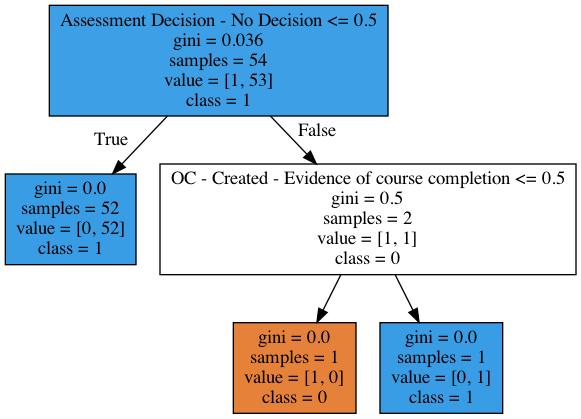

In [14]:
# Show graph
Image(graph.create_png())

In [15]:
# Create PNG
graph.write_png("engineering_OF_segment1_workflowS3_decisiontree.png")







True

In [16]:
zero_one_table['Release Offer'].value_counts()

1    71
0     2
Name: Release Offer, dtype: int64

In [17]:
from sklearn.utils import resample

# Separate majority and minority classes
zero_one_table_majority = df[zero_one_table['Release Offer']==1]
zero_one_table_minority = df[zero_one_table['Release Offer']==0]

# Upsample minority class
df_majority_downsampled = resample(zero_one_table_majority,
                                 replace=False,     # sample with replacement
                                 n_samples=2,    # to match majority class
                                 random_state=123) # reproducible results

# Combine majority class with upsampled minority class
df_downsampled = pd.concat([zero_one_table_minority, df_majority_downsampled])

# Display new class counts
df_downsampled = df_downsampled.fillna(0)
df_downsampled['Release Offer'].value_counts()

1    2
0    2
Name: Release Offer, dtype: int64

In [18]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

X=df_downsampled[features]
y=df_downsampled ['Release Offer'] # Labels
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) # 70% training and 30% test

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 8,
                             random_state = 0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [20]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [21]:
# DOT data
from IPython.display import Image
from sklearn import tree
import pydotplus
fn=features
cn=['0', '1']
# Create DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=fn,
                                class_names=cn,filled = True)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

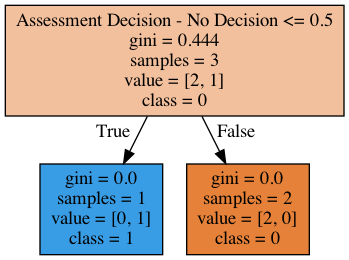

In [22]:
# Show graph
Image(graph.create_png())

In [23]:
# Create PNG
graph.write_png("engineering_OF_segment1_workflowS3_decisiontree_downsampled.png")

True